In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
file_path = "/content/insurance.csv"
df = pd.read_csv(file_path)

#**Binomial Probability in Insurance Claims**

In [5]:
# Estimate probability of being a smoker
p_smoker = (df['smoker'] == 'yes').mean()  # Assuming 'smoker' column has 'yes' or 'no' values

# Given values
n = 10  # Total selections
p = p_smoker  # Probability of selecting a smoker
k_min = 4  # At least 4 smokers

In [3]:
# Compute probability using binomial formula (1 - P(X ≤ 3))
p_at_least_4 = 1 - stats.binom.cdf(k_min - 1, n, p)
print(f"Probability of selecting at least 4 smokers: {p_at_least_4:.4f}")

# Plot the Binomial Distribution
x = np.arange(0, n+1)
y = stats.binom.pmf(x, n, p)

Probability of selecting at least 4 smokers: 0.1295


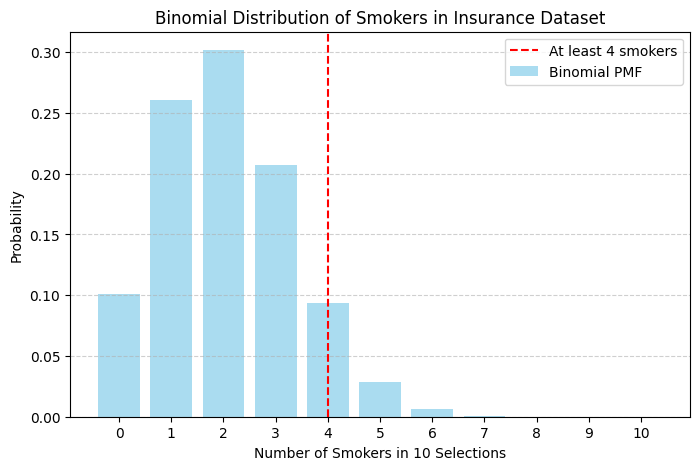

In [4]:
plt.figure(figsize=(8, 5))
plt.bar(x, y, color='skyblue', alpha=0.7, label="Binomial PMF")
plt.axvline(k_min, color='red', linestyle='--', label=f'At least {k_min} smokers')
plt.xlabel('Number of Smokers in 10 Selections')
plt.ylabel('Probability')
plt.title('Binomial Distribution of Smokers in Insurance Dataset')
plt.xticks(range(n+1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#**Risk Estimation Using Binomial Distribution**

In [7]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


In [9]:
# Define parameters
n = 15  # Total individuals selected
k_exact = 5  # Exactly 5 individuals
p_expensive = (df['expenses'] > 20000).mean()  # Probability of having expenses above $20,000

In [10]:
# (a) Compute probability of exactly 5 individuals having expenses > $20,000
p_exact_5 = stats.binom.pmf(k_exact, n, p_expensive)
print(f"Probability of exactly 5 individuals having expenses > $20,000: {p_exact_5:.4f}")

Probability of exactly 5 individuals having expenses > $20,000: 0.1084


In [11]:
# (b) Compute cumulative probability of at most 5 individuals having expenses > $20,000
p_at_most_5 = stats.binom.cdf(k_exact, n, p_expensive)
print(f"Cumulative probability of at most 5 individuals having expenses > $20,000: {p_at_most_5:.4f}")

Cumulative probability of at most 5 individuals having expenses > $20,000: 0.9336


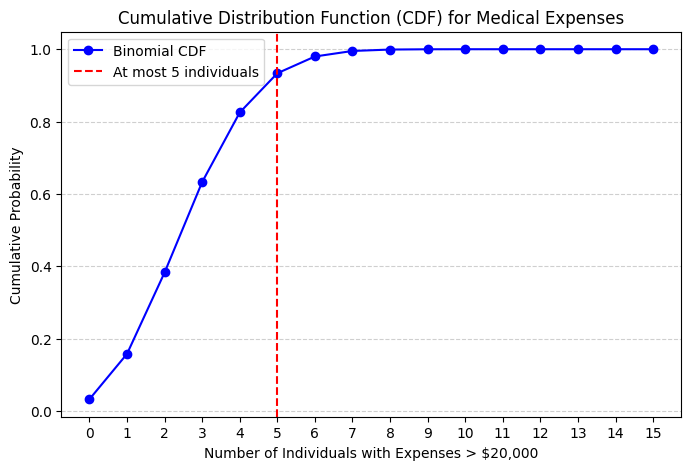

In [12]:
# (c) Plot the cumulative distribution function (CDF)
x = np.arange(0, n+1)
y_cdf = stats.binom.cdf(x, n, p_expensive)

plt.figure(figsize=(8, 5))
plt.plot(x, y_cdf, marker='o', linestyle='-', color='blue', label="Binomial CDF")
plt.axvline(k_exact, color='red', linestyle='--', label=f'At most {k_exact} individuals')
plt.xlabel('Number of Individuals with Expenses > $20,000')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) for Medical Expenses')
plt.xticks(range(n+1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#**Estimating Regional Smoking Rates Using Binomial Approximation**

In [13]:
# Define parameters
n = 50  # Number of individuals per sample
num_samples = 1000  # Number of simulations
regions = {
    "Southwest": 0.25,
    "Southeast": 0.30,
    "Northwest": 0.20,
    "Northeast": 0.35
}

In [14]:
# (a) Simulate 1000 samples for each region
simulated_data = {region: np.random.binomial(n, p, num_samples) for region, p in regions.items()}

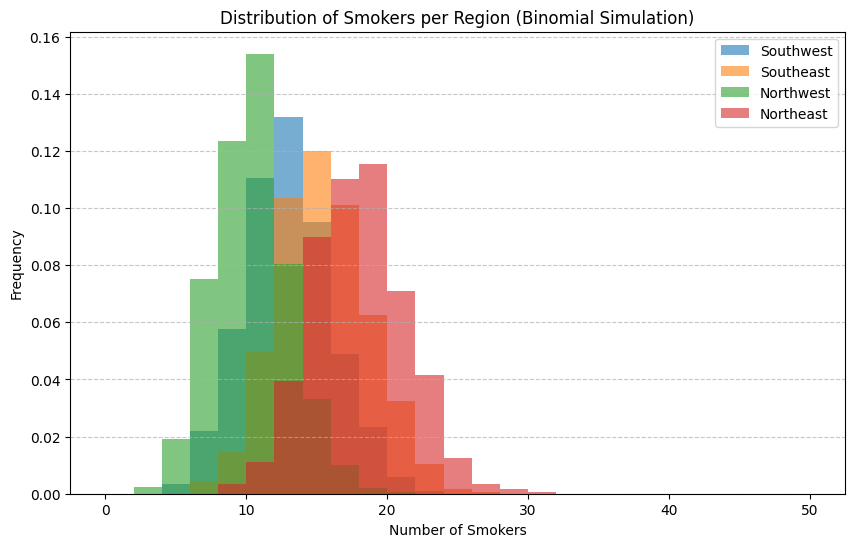

In [15]:
# (b) Visualize the distribution of smokers per region with a bar chart
plt.figure(figsize=(10, 6))
for region, data in simulated_data.items():
    plt.hist(data, bins=range(0, n+1, 2), alpha=0.6, label=region, density=True)

plt.xlabel("Number of Smokers")
plt.ylabel("Frequency")
plt.title("Distribution of Smokers per Region (Binomial Simulation)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
# (c) Compute expected number of smokers per region using Binomial Expectation formula (E[X] = n * p)
expected_smokers = {region: n * p for region, p in regions.items()}

# Compute the mean of the simulated results
simulated_means = {region: np.mean(data) for region, data in simulated_data.items()}

# Compare expected vs simulated results
print("Expected vs Simulated Number of Smokers per Region:")
for region in regions.keys():
    print(f"{region}: Expected = {expected_smokers[region]:.2f}, Simulated = {simulated_means[region]:.2f}")

Expected vs Simulated Number of Smokers per Region:
Southwest: Expected = 12.50, Simulated = 12.47
Southeast: Expected = 15.00, Simulated = 14.94
Northwest: Expected = 10.00, Simulated = 9.88
Northeast: Expected = 17.50, Simulated = 17.47


#**Inverse Probability & Quantile Function for Insurance Risks**

In [17]:
# (a) Find the threshold for high-risk individuals (top 10% most expensive claims)
threshold = np.percentile(df['expenses'], 90)
print(f"Threshold insurance charge for high-risk classification: ${threshold:.2f}")

Threshold insurance charge for high-risk classification: $34831.72


In [19]:
# (b) Find the probability of selecting exactly 8 high-risk individuals in a sample of 30
n = 30  # Total policyholders sampled
k_high_risk = 8  # Exactly 8 high-risk individuals
p_high_risk = (df['expenses'] > threshold).mean()  # Probability of high-risk individuals

p_exact_8 = stats.binom.pmf(k_high_risk, n, p_high_risk)
print(f"Probability of selecting exactly 8 high-risk individuals: {p_exact_8:.4f}")

Probability of selecting exactly 8 high-risk individuals: 0.0058


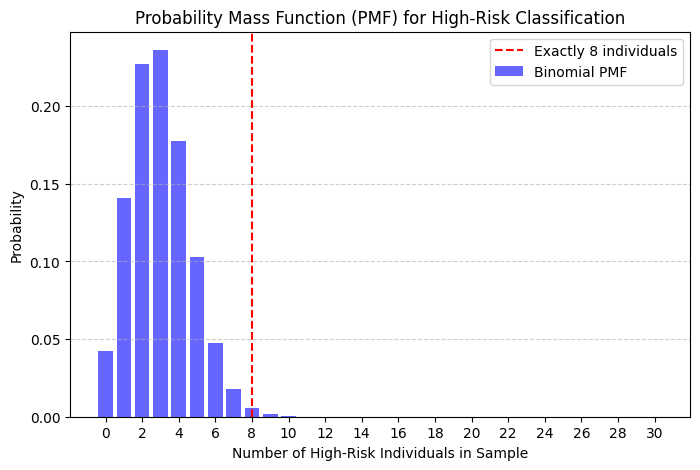

In [20]:
# (c) Plot the Probability Mass Function (PMF)
x = np.arange(0, n+1)
y_pmf = stats.binom.pmf(x, n, p_high_risk)

plt.figure(figsize=(8, 5))
plt.bar(x, y_pmf, color='blue', alpha=0.6, label="Binomial PMF")
plt.axvline(k_high_risk, color='red', linestyle='--', label=f'Exactly {k_high_risk} individuals')
plt.xlabel('Number of High-Risk Individuals in Sample')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) for High-Risk Classification')
plt.xticks(range(0, n+1, 2))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#** Modeling the Probability of Having More than 3 Children**

In [21]:
# Given parameters
n = 12  # Number of individuals in each sample
p_more_than_3_children = 0.4  # Probability of having more than 3 children
k_min = 5  # At least 5 individuals

In [22]:
# (a) Compute probability using the Binomial CDF: P(X >= 5) = 1 - P(X <= 4)
p_at_least_5 = 1 - stats.binom.cdf(k_min - 1, n, p_more_than_3_children)

# Compute manually using Binomial formula: P(X = k) = C(n, k) * p^k * (1-p)^(n-k)
manual_prob = sum(stats.binom.pmf(k, n, p_more_than_3_children) for k in range(k_min, n+1))

print(f"Probability (pbinom) of at least 5 individuals having >3 children: {p_at_least_5:.4f}")
print(f"Probability (manual calculation) of at least 5 individuals: {manual_prob:.4f}")

Probability (pbinom) of at least 5 individuals having >3 children: 0.5618
Probability (manual calculation) of at least 5 individuals: 0.5618


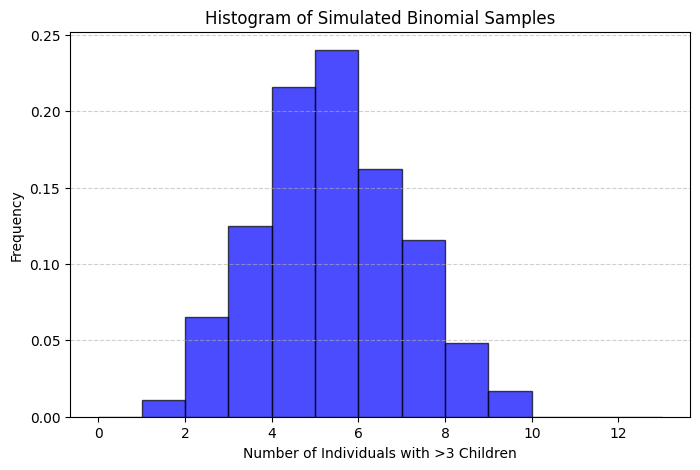

In [23]:
# (b) Simulate 1000 samples using rbinom (random binomial generation)
num_samples = 1000
simulated_data = np.random.binomial(n, p_more_than_3_children, num_samples)

# Visualize histogram of simulated results
plt.figure(figsize=(8, 5))
plt.hist(simulated_data, bins=range(0, n+2), density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Number of Individuals with >3 Children")
plt.ylabel("Frequency")
plt.title("Histogram of Simulated Binomial Samples")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [24]:
# (c) Compare simulated mean and variance with theoretical binomial distribution
simulated_mean = np.mean(simulated_data)
simulated_variance = np.var(simulated_data, ddof=1)  # Sample variance

# Theoretical mean and variance for Binomial(n, p): E[X] = n*p, Var(X) = n*p*(1-p)
theoretical_mean = n * p_more_than_3_children
theoretical_variance = n * p_more_than_3_children * (1 - p_more_than_3_children)

print(f"Simulated Mean: {simulated_mean:.4f}, Theoretical Mean: {theoretical_mean:.4f}")
print(f"Simulated Variance: {simulated_variance:.4f}, Theoretical Variance: {theoretical_variance:.4f}")

Simulated Mean: 4.9010, Theoretical Mean: 4.8000
Simulated Variance: 2.8000, Theoretical Variance: 2.8800
